In [31]:
from sklearn import datasets
import matplotlib.pyplot as plt

#load

digits = datasets.load_digits()

In [32]:
from sklearn.model_selection import train_test_split
import numpy as np

x = digits.data
y= digits.target

x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2)

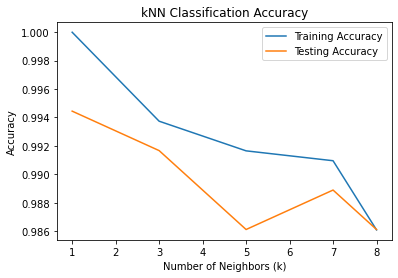

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
##Implement kNN classification for the above dataset.
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the classifier with different k values
k_values = [1, 3, 5, 7, 8]
train_accuracy_scores = []
test_accuracy_scores = []


for k in k_values:
    # Initialize kNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn.fit(x_train, y_train)
    
    ##Compute and plot the accuracy scores by k values.
    # Test the classifier on training data
    y_train_pred = knn.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_scores.append(train_accuracy)
    # Test the classifier on test data
    y_test_pred = knn.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracy_scores.append(test_accuracy)

# Plot the accuracy scores
plt.plot(k_values, train_accuracy_scores, label='Training Accuracy')
plt.plot(k_values, test_accuracy_scores, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN Classification Accuracy')
plt.legend()
plt.show()



In [23]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target

# Randomly select a subset of the data
subset_size = 3000
X_subset, _, y_subset, _ = train_test_split(X, y, train_size=subset_size, random_state=42)

In [24]:
# Use the subset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

# Scale the features of the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)





In [25]:
# Create SVM classifiers with different kernels
svm_linear = SVC(kernel='linear', C=1.0)
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_rbf = SVC(kernel='rbf', gamma='auto', C=1.0)

# Train the classifiers on the training data
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)



SVC(gamma='auto')

In [26]:
# Predict the labels of the test data
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Print the classification report for each classifier
print("Linear kernel:")
print(classification_report(y_test, y_pred_linear,zero_division=1))
print("Polynomial kernel:")
print(classification_report(y_test, y_pred_poly,zero_division=1))
print("RBF kernel:")
print(classification_report(y_test, y_pred_rbf,zero_division=1))

Linear kernel:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        62
           1       0.99      0.96      0.97        78
           2       0.94      0.94      0.94        54
           3       0.90      0.92      0.91        62
           4       0.92      0.96      0.94        56
           5       0.92      0.87      0.89        63
           6       0.93      0.97      0.95        59
           7       0.93      0.86      0.89        58
           8       0.90      0.86      0.88        65
           9       0.75      0.84      0.79        43

    accuracy                           0.92       600
   macro avg       0.91      0.92      0.91       600
weighted avg       0.92      0.92      0.92       600

Polynomial kernel:
              precision    recall  f1-score   support

           0       0.96      0.77      0.86        62
           1       0.96      0.94      0.95        78
           2       0.97      0.59      0.74 

Accuracy score:  0.5933333333333334


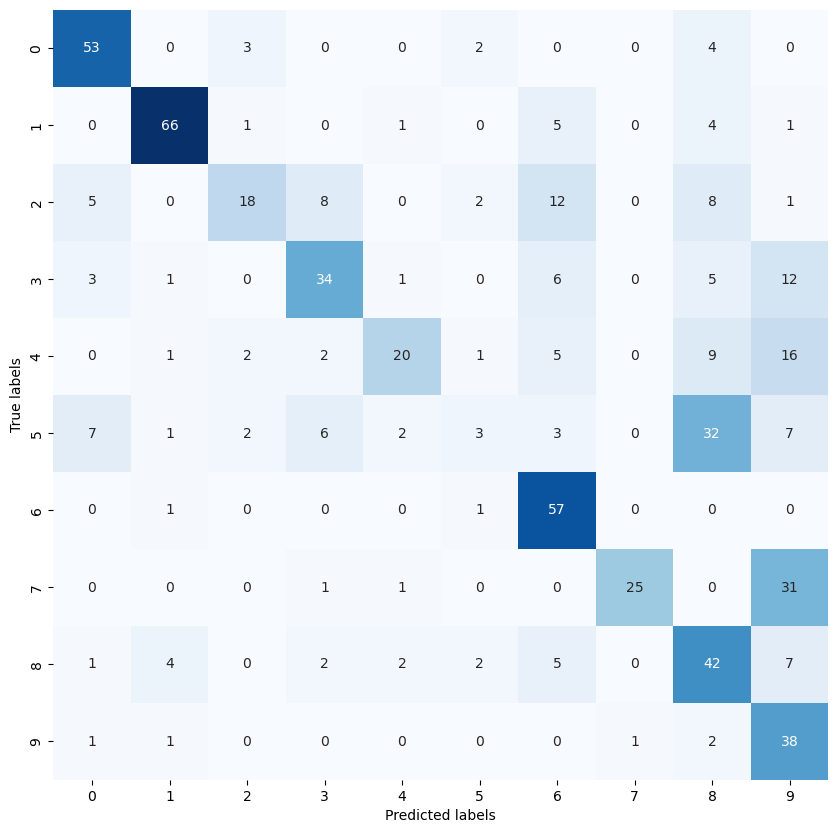

In [27]:
# Import function
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Train a Naive Bayes classifier on the training data
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score: ", accuracy)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

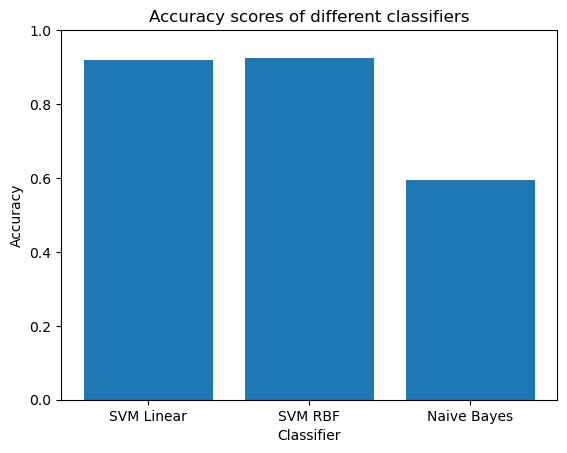

In [29]:
# Train the classifiers on the training data
svm_linear = SVC(kernel='linear', C=1.0)
svm_rbf = SVC(kernel='rbf', gamma='auto', C=1.0)
nb = GaussianNB()

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
nb.fit(X_train, y_train)

# Compute the accuracy scores
acc_linear = accuracy_score(y_test, y_pred_linear)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
acc_nb = accuracy_score(y_test, y_pred_nb)

# Compute the confusion matrices
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot the accuracy scores
labels = ['SVM Linear', 'SVM RBF', 'Naive Bayes']
accuracy_scores = [acc_linear, acc_rbf, acc_nb]
plt.bar(labels, accuracy_scores)
plt.title('Accuracy scores of different classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

